# Demos: Lecture 13

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Demo 1: Parameter-shift rules

Suppose we run a parametrized circuit $U(\theta)$ and measure $\langle B \rangle$. The output, $\langle B \rangle$, is a function of the parameter $\theta$. The parameter-shift rule allows us to evaluate the gradient of this function at any point:

$$
\frac{\partial \langle B \rangle}{\partial \theta} = \frac{1}{2} \left( U(\theta + \pi/2) - U(\theta - \pi/2) \right),
$$

where the notation $U(\theta + \pi/2)$ implicitly means the output of running $U(\theta)$ at a particular parameter value. This works even for circuits with multiple parameters: we can apply the parameter-shift rule to each parameter independently.

**Exercise**: Write a QNode that implements the quantum circuit below. Then:
 - use the parameter-shift rules to compute the gradients with respect to each of the parameters ($\theta = 0.1, \phi = 0.2$) indepedently
 - compare this to the gradients obtained using `qml.grad` on both parameters

<img src="fig/two_param_opt.png" width="800">

theta: 0.975
phi: -0.019

In [2]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev, diff_method="parameter-shift")
def my_qfunc(theta, phi):
    qml.RY(theta, wires=0)
    qml.RX(phi, wires=1)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))

In [3]:
0.5 * (my_qfunc(0.1 + np.pi/2, 0.2) - my_qfunc(0.1 - np.pi/2, 0.2))

/home/olivia/Code/pennylane/pennylane/qnode.py:823: UserWarning: The device was switched during the call of the QNode, to avoid this behaviour definean interface argument instead of auto.
  warnings.warn(


tensor(0.97517033, requires_grad=True)

In [4]:
0.5 * (my_qfunc(0.1, 0.2 + np.pi/2) - my_qfunc(0.1, 0.2 - np.pi/2))

tensor(-0.01983384, requires_grad=True)

In [6]:
theta = np.array(0.1, requires_grad=True)
phi = np.array(0.2, requires_grad=True)

grad_func = qml.grad(my_qfunc)
grad_func(theta, phi)

(array(0.97517033), array(-0.01983384))

In [11]:
theta = np.array(0., requires_grad=True)
phi = np.array(0., requires_grad=True)

opt = qml.GradientDescentOptimizer()

num_its = 200
running_costs = []

for _ in range(num_its):
    (theta, phi), _cost = opt.step_and_cost(my_qfunc, theta, phi)
    running_costs.append(_cost)

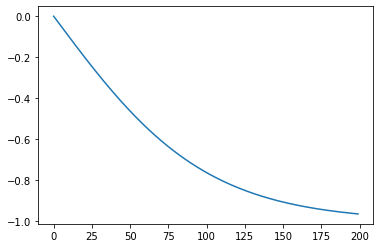

In [12]:
plt.plot(running_costs)

In [13]:
theta

tensor(-1.30352431, requires_grad=True)

In [15]:
phi

tensor(0., requires_grad=True)